In [72]:
from tools.DataLoader import DataLoader
from tools.EDA import EDA
from tools.DataPreprocessor import DataPreprocessor
from tools.ModelPipeline import ModelPipeline
from tools.FeatureEngineeringTool import FeatureEngineeringTool

from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import Pipeline

In [73]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(
    request_type="local", path="db/mod_05_topic_10_various_data.pkl"
)
df_dict = data_loader.load_data()
df = df_dict["autos"]

In [74]:
# Step 2: Perform EDA using the EDA class
eda = EDA(df)

# Perform EDA using the EDA class
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               193 non-null    object 
 1   fuel_type          193 non-null    object 
 2   aspiration         193 non-null    object 
 3   num_of_doors       193 non-null    int64  
 4   body_style         193 non-null    object 
 5   drive_wheels       193 non-null    object 
 6   engine_location    193 non-null    object 
 7   wheel_base         193 non-null    float64
 8   length             193 non-null    float64
 9   width              193 non-null    float64
 10  height             193 non-null    float64
 11  curb_weight        193 non-null    int64  
 12  engine_type        193 non-null    object 
 13  num_of_cylinders   193 non-null    int64  
 14  engine_size        193 non-null    int64  
 15  fuel_system        193 non-null    object 
 16  bore

None

,Column,Has_Nulls,Dtype
make,make,False,object
fuel_type,fuel_type,False,object
aspiration,aspiration,False,object
num_of_doors,num_of_doors,False,int64
body_style,body_style,False,object
drive_wheels,drive_wheels,False,object
engine_location,engine_location,False,object
wheel_base,wheel_base,False,float64
length,length,False,float64
width,width,False,float64



Dataset Shape:

(193, 24)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
num_of_doors,193.0,3.160622,0.989583,2.00,2.00,4.00,4.00,4.00
wheel_base,193.0,98.923834,6.152409,86.60,94.50,97.00,102.40,120.90
length,193.0,174.326425,12.478593,141.10,166.30,173.20,184.60,208.10
width,193.0,65.893782,2.137795,60.30,64.10,65.40,66.90,72.00
height,193.0,53.869948,2.394770,47.80,52.00,54.10,55.70,59.80
curb_weight,193.0,2561.507772,526.700026,1488.00,2145.00,2414.00,2952.00,4066.00
num_of_cylinders,193.0,4.419689,1.023182,3.00,4.00,4.00,4.00,12.00
engine_size,193.0,128.124352,41.590452,61.00,98.00,120.00,146.00,326.00
bore,193.0,3.330622,0.272385,2.54,3.15,3.31,3.59,3.94
stroke,193.0,3.248860,0.315421,2.07,3.11,3.29,3.41,4.17



Missing Values:



make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


Sample Data:



,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [75]:
# Visualize data
# eda.plot_histogram(y="price")
# eda.plot_scatter(y="price")

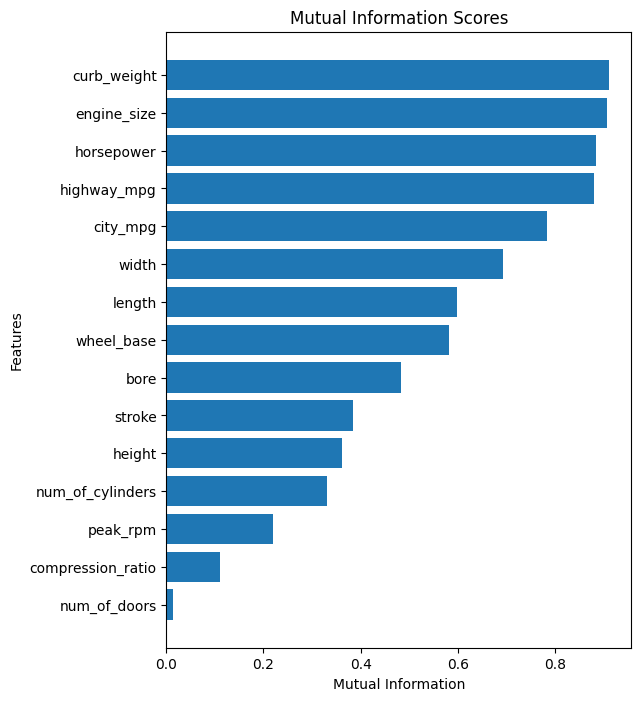

In [76]:
eda.calculate_mutual_information(target="price", plot=True)

In [77]:
fet = FeatureEngineeringTool(df)

fet.remove_features([])

df = fet.df

No features removed


In [78]:
# Initialize DataPreprocessor
preprocessor = DataPreprocessor(df)

In [79]:
# Split data
X_train, X_test, y_train, y_test = preprocessor.split_data(target_column="price")

In [80]:
# Define transformers
numeric_transformers = [
    ("imputer", SimpleImputer(strategy="mean")),
]
categorical_transformers = [
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", TargetEncoder(handle_unknown="ignore")),
]
final_transformers = [
    ("power", PowerTransformer()),
]

In [81]:
# Create pipeline
preprocessor.create_pipeline(
    numeric_transformers, categorical_transformers, final_transformers
)

# Fit and transform train data
X_train_transformed = preprocessor.fit_transform(X_train, y_train)

# Transform test data
X_test_transformed = preprocessor.transform(X_test)

In [82]:
# Visualize pipeline
preprocessor.visualize_pipeline()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['num_of_doors', 'wheel_base',
                                                   'length', 'width', 'height',
                                                   'curb_weight',
                                                   'num_of_cylinders',
                                                   'engine_size', 'bore',
                                                   'stroke',
                                                   'compression_ratio',
                                                   'horsepower', 'peak_rpm',
                                                   'city_mpg', 'highway_mpg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'fuel_type',
                                                   'aspiration', 'body_style',
                                                   'drive_wheels',
                                                   'engine_location',
                                                   'engine_type',
                                                   'fuel_system'])])),
                ('power', PowerTransformer())])

In [83]:
# Define pipelines for different models

pipelines = {
    "RandomForest": Pipeline(
        [
            ("regressor", RandomForestRegressor(random_state=42)),
        ]
    ),
    "GradientBoosting": Pipeline(
        [
            ("regressor", GradientBoostingRegressor(random_state=42)),
        ]
    ),
}

In [84]:
# Define hyperparameters for different models
param_grids = {
    "RandomForest": {
        "regressor__n_estimators": [50, 100],
        "regressor__max_features": ["sqrt", "log2"],
        "regressor__max_depth": [10, 20, None],
    },
    "GradientBoosting": {
        "regressor__n_estimators": [50, 100],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7],
    },
}

In [85]:
# Initialize and train model pipeline
model_pipeline = ModelPipeline()
model_pipeline.train(X_train_transformed, y_train, pipelines, param_grids)

In [86]:
# Visualize pipeline for RandomForest
model_pipeline.visualize_pipeline("RandomForest")

Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=50, random_state=42))])

In [87]:
# Visualize pipeline for GradientBoosting
model_pipeline.visualize_pipeline("GradientBoosting")

Pipeline(steps=[('regressor',
                 GradientBoostingRegressor(learning_rate=0.2, n_estimators=50,
                                           random_state=42))])

In [88]:
# Display results on validation set
model_pipeline.display_results(X_train_transformed, y_train)

Results for RandomForest:


,Metric,Parameter,Value
0,Best Parameters,regressor__max_depth,10
1,Best Parameters,regressor__max_features,sqrt
2,Best Parameters,regressor__n_estimators,50


,Metric,Value
0,R²,0.987529
1,MAE,564.844663
2,MAPE,0.042593


Results for GradientBoosting:


,Metric,Parameter,Value
0,Best Parameters,regressor__learning_rate,0.2
1,Best Parameters,regressor__max_depth,3.0
2,Best Parameters,regressor__n_estimators,50.0


,Metric,Value
0,R²,0.996233
1,MAE,373.431534
2,MAPE,0.036067


<Figure size 1200x800 with 0 Axes>

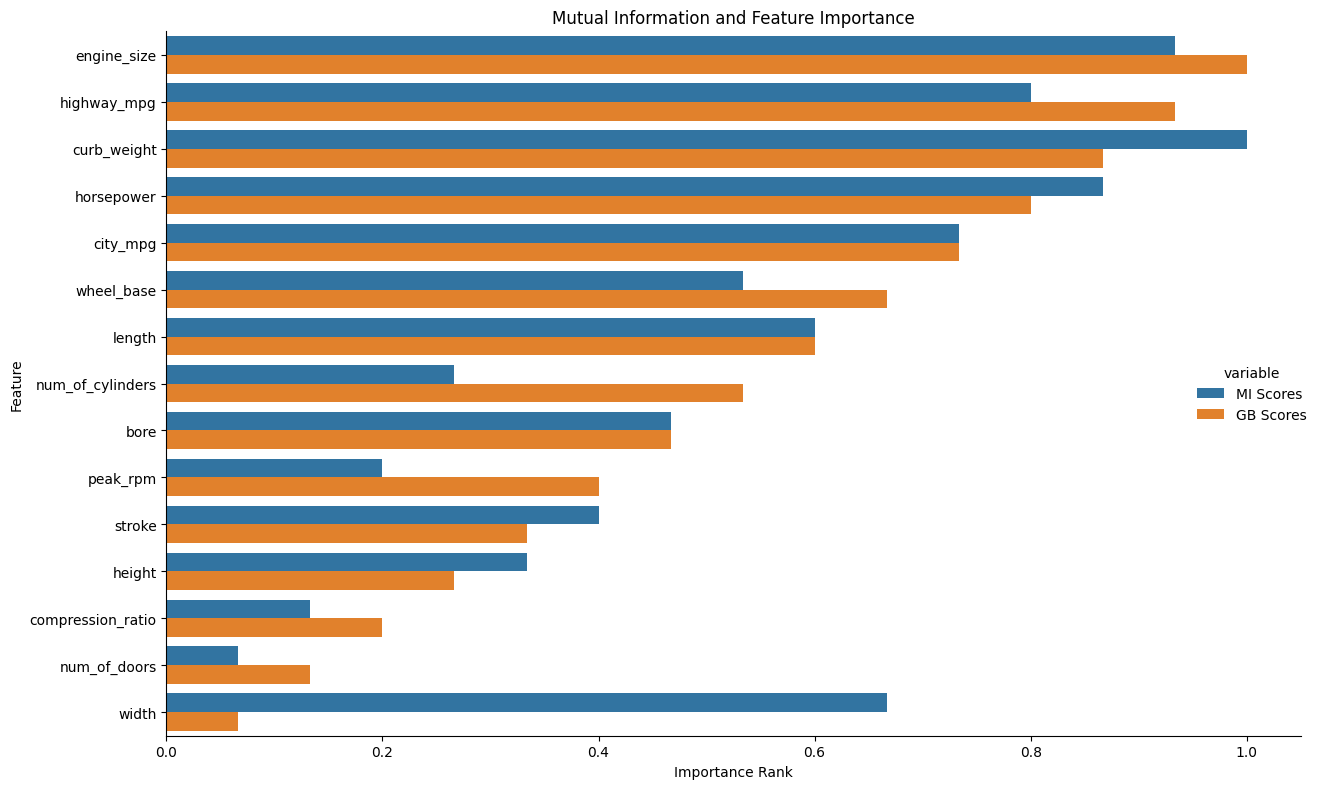

In [89]:
# Plot the mutual information and feature importance.

feature_importance = model_pipeline.feature_importances[model_pipeline.best_model_name]
importance_df = eda.scale_and_plot_importance(
    feature_importance, rank_pct=True, sort_by="FeatureImportanceRank"
)

In [90]:
# Validate on test set
model_pipeline.validate_on_test(X_test_transformed, y_test)

Results for RandomForest:


,R²,MAE,MAPE
RandomForest,0.930563,1750.68367,12.31%


# Сonclusions